# 절기

In [4]:
import os
import numpy as np 
import pandas as pd
from korean_lunar_calendar import KoreanLunarCalendar

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

# 절기 구분을 위한 모듈
import datetime
dateformat = '%Y-%m-%d'

In [5]:
BASE_DIR = './data'

In [6]:
train_path = os.path.join(BASE_DIR, '2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210902_update.xlsx')

data = pd.read_excel(train_path)
data = data[1 : ]
data = data.reset_index(drop = True)
data.loc[2196, '홍수사상번호'] = 20                     # 잘못된 정보
data.iloc[:,6:] = data.iloc[:,6:].apply(pd.to_numeric)  # 수치형으로 변환

data.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', 
                '1_유역평균강수', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)', 
                '2_유역평균강수', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)', '2_수위(D지역)', 
                '3_유역평균강수', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)', '3_수위(D지역)',
                '4_유역평균강수', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)', '4_수위(D지역)',
                '5_유역평균강수', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)', '5_수위(D지역)',
                '6_유역평균강수', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)', '6_수위(D지역)']

In [7]:
data_feat = data.copy()
data_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   홍수사상번호     3051 non-null   float64
 1   연          3051 non-null   float64
 2   월          3051 non-null   float64
 3   일          3051 non-null   float64
 4   시간         3051 non-null   float64
 5   유입량        2891 non-null   float64
 6   1_유역평균강수   3051 non-null   float64
 7   1_강우(A지역)  3051 non-null   int64  
 8   1_강우(B지역)  3051 non-null   int64  
 9   1_강우(C지역)  3051 non-null   int64  
 10  1_강우(D지역)  3051 non-null   int64  
 11  1_수위(E지역)  3051 non-null   float64
 12  1_수위(D지역)  3051 non-null   float64
 13  2_유역평균강수   3051 non-null   float64
 14  2_강우(A지역)  3051 non-null   int64  
 15  2_강우(B지역)  3051 non-null   int64  
 16  2_강우(C지역)  3051 non-null   int64  
 17  2_강우(D지역)  3051 non-null   int64  
 18  2_수위(E지역)  3051 non-null   float64
 19  2_수위(D지역)  3051 non-null   float64
 20  3_유역평균강수

In [8]:
# 6/28 부터 9/24일 까지 시작일 포함 총 89일.
data_feat.groupby(['월'])['일'].min(), data_feat.groupby(['월'])['일'].max()

(월
 6.0    28.0
 7.0     1.0
 8.0     1.0
 9.0     1.0
 Name: 일, dtype: float64,
 월
 6.0    30.0
 7.0    31.0
 8.0    31.0
 9.0    24.0
 Name: 일, dtype: float64)

In [9]:
# 입추가 8/7일 이걸로 절기를 나눠보는걸로
data_feat

,홍수사상번호,연,월,일,시간,유입량,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),...,5_강우(D지역),5_수위(E지역),5_수위(D지역),6_유역평균강수,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역)
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7,7,7,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7,8,7,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7,9,7,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7,10,7,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7,12,8,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1,0,0,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1,0,0,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1,0,0,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1,0,0,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


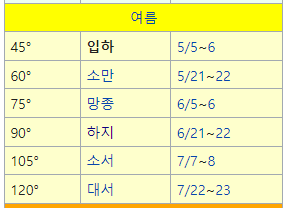

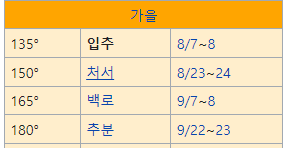

In [10]:
data_time = data_feat[['연', '월', '일', '시간']]

In [11]:
data_time['연'] = [str(int(i)) for i in data_time['연']]
data_time['월'] = [str(int(i)) for i in data_time['월']]
data_time['일'] = [str(int(i)) for i in data_time['일']]
data_time['시간'] = [str(int(i)) for i in data_time['시간']]
data_time

,연,월,일,시간
0,2006,7,10,8
1,2006,7,10,9
2,2006,7,10,10
3,2006,7,10,11
4,2006,7,10,12
...,...,...,...,...
3046,2018,7,7,17
3047,2018,7,7,18
3048,2018,7,7,19
3049,2018,7,7,20


In [12]:
# 7월 8일 기준으로 일 차이를 열로 만든다 (소서)
data_time['월일'] = data_time['월'] + '-' + data_time['일']
data_time['월일'] = [datetime.datetime.strptime(i, '%m-%d')  for i in data_time['월일']]
data_time['월일'] = data_time['월일'] - datetime.datetime.strptime('7-8', '%m-%d')
data_time['월일'] = [i.days for i in data_time['월일']]
data_time['절기'] = data_time['월일']
data_time['절기'] = [i // 15 for i in data_time['절기']]
data_time

,연,월,일,시간,월일,절기
0,2006,7,10,8,2,0
1,2006,7,10,9,2,0
2,2006,7,10,10,2,0
3,2006,7,10,11,2,0
4,2006,7,10,12,2,0
...,...,...,...,...,...,...
3046,2018,7,7,17,-1,-1
3047,2018,7,7,18,-1,-1
3048,2018,7,7,19,-1,-1
3049,2018,7,7,20,-1,-1


In [13]:
# 6/28 부터 9/24일 까지 시작일 포함 총 89일.
for i in range(len(data_time)) :
  if data_time['절기'].iloc[i] < 0 :
    data_time.loc[i, '절기'] = '하지'
  elif data_time['절기'].iloc[i] == 0 :
    data_time.loc[i, '절기'] = '소서'
  elif data_time['절기'].iloc[i] == 1 :
    data_time.loc[i, '절기'] = '대서'
  elif data_time['절기'].iloc[i] == 2 :
    data_time.loc[i, '절기'] = '입추'
  elif data_time['절기'].iloc[i] == 3 :
    data_time.loc[i, '절기'] = '처서'
  elif data_time['절기'].iloc[i] == 4 :
    data_time.loc[i, '절기'] = '백로'
  else :
    data_time.loc[i, '절기'] = '추분'

In [14]:
data_time['월일'].value_counts()

 7     136
 6     129
 8     120
 5     115
 9     108
      ... 
 33      6
 72      4
 78      3
-10      2
 30      1
Name: 월일, Length: 75, dtype: int64

In [15]:
data_time['절기'].value_counts()

소서    1227
대서     529
하지     464
입추     383
백로     196
처서     177
추분      75
Name: 절기, dtype: int64

In [16]:
data_time = data_time[['절기']]
data_feat = pd.concat([data_feat, data_time], axis = 1)

In [17]:
data_feat

,홍수사상번호,연,월,일,시간,유입량,1_유역평균강수,1_강우(A지역),1_강우(B지역),1_강우(C지역),...,5_수위(E지역),5_수위(D지역),6_유역평균강수,6_강우(A지역),6_강우(B지역),6_강우(C지역),6_강우(D지역),6_수위(E지역),6_수위(D지역),절기
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7,7,7,...,2.54,122.660,6.4000,7,7,8,8,2.54,122.610,소서
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7,8,7,...,2.53,122.648,7.3000,7,8,10,10,2.53,122.600,소서
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7,9,7,...,2.53,122.636,8.2000,7,9,10,11,2.53,122.590,소서
3,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7,10,7,...,2.53,122.620,11.3000,9,10,15,14,2.53,122.585,소서
4,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7,12,8,...,2.53,122.604,14.4000,12,12,18,16,2.53,122.575,소서
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1,0,0,...,3.16,129.916,2.1722,1,0,0,0,3.16,129.950,하지
3047,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1,0,0,...,3.15,129.928,2.0805,1,0,0,0,3.15,129.970,하지
3048,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1,0,0,...,3.13,129.940,2.0354,1,0,0,0,3.13,129.980,하지
3049,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1,0,0,...,3.11,129.952,1.8993,1,0,0,0,3.11,129.990,하지
